In [1]:
import pandas as pd
import scipy as stats
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
sb.set_style('whitegrid')
%matplotlib inline

#### Loading And Reading Dataset

In [2]:
data=pd.read_csv("13.csv",error_bad_lines=False)

#data = pd.read_excel("kartik_project.xlsx",)

In [3]:
data.head()

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr
0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,11,3,2019
1,Japan,Japan,Japan,TOKYO,TOKYO,MOPERA.NET,TABLET,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1,0,1,www.ibm.com/privacy/us/en,11,3,2019
2,United States,United States,North America,ELK GROVE,CALIFORNIA,COMCASTBUSINESS.NET,MOBILEPHONE,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,1,0,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,11,3,2019
3,Brazil,Brazil,Latin America,SAO FRANCISCO DE GOIAS,GOIAS,VIVOZAP.COM.BR,MOBILEPHONE,ANDROID_6.0,cb9ffa7be250fc62426a431a4f08bc0c8222f63514ba39...,MOZILLA/5.0 (LINUX; ANDROID 6.0; PT-BR; 5010E ...,1,0,1,www.ibm.com/analytics/br/pt/business-intelligence,11,3,2019
4,France,France,Europe,BEZONS,VAL-D'OISE,PROXAD.NET,MOBILEPHONE,ANDROID_9,7ce278be1b02a0253cc0219fa9ceddfe8e91846be343a4...,MOZILLA/5.0 (LINUX; ANDROID 9; SM-G965F BUILD/...,1,0,1,www.ibm.com/watson/fr-fr,11,3,2019


#### Describing Dataset

In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048573 entries, 0 to 1048572
Data columns (total 17 columns):
ctry_name                      1048573 non-null object
intgrtd_mngmt_name             1048573 non-null object
intgrtd_operating_team_name    1048573 non-null object
city                           1001987 non-null object
st                             1003128 non-null object
sec_lvl_domn                   729116 non-null object
device_type                    206532 non-null object
operating_sys                  1046753 non-null object
ip_addr                        1048573 non-null object
user_agent                     1048567 non-null object
VISIT                          1048573 non-null int64
ENGD_VISIT                     1048573 non-null int64
VIEWS                          1048573 non-null int64
page_url                       1048572 non-null object
wk                             1048573 non-null int64
mth                            1048573 non-null int64
yr            

,VISIT,ENGD_VISIT,VIEWS,wk,mth,yr
count,1.048573e+06,1.048573e+06,1.048573e+06,1048573.0,1048573.0,1048573.0
mean,1.108003e+00,3.440018e-01,1.410784e+00,11.0,3.0,2019.0
std,2.359586e+00,1.157801e+00,3.242692e+00,0.0,0.0,0.0
min,1.000000e+00,0.000000e+00,1.000000e+00,11.0,3.0,2019.0
25%,1.000000e+00,0.000000e+00,1.000000e+00,11.0,3.0,2019.0
50%,1.000000e+00,0.000000e+00,1.000000e+00,11.0,3.0,2019.0
75%,1.000000e+00,1.000000e+00,1.000000e+00,11.0,3.0,2019.0
max,1.195000e+03,6.940000e+02,1.196000e+03,11.0,3.0,2019.0


#### Checking Columns and Shape of Dataset

In [5]:
data.columns

Index(['ctry_name', 'intgrtd_mngmt_name', 'intgrtd_operating_team_name',
       'city', 'st', 'sec_lvl_domn', 'device_type', 'operating_sys', 'ip_addr',
       'user_agent', 'VISIT', 'ENGD_VISIT', 'VIEWS', 'page_url', 'wk', 'mth',
       'yr'],
      dtype='object')

In [6]:
data.shape

(1048573, 17)

# 1. Data Cleansing
####  Checking for Missing values

In [7]:
data.isnull().sum()

ctry_name                           0
intgrtd_mngmt_name                  0
intgrtd_operating_team_name         0
city                            46586
st                              45445
sec_lvl_domn                   319457
device_type                    842041
operating_sys                    1820
ip_addr                             0
user_agent                          6
VISIT                               0
ENGD_VISIT                          0
VIEWS                               0
page_url                            1
wk                                  0
mth                                 0
yr                                  0
dtype: int64

#### Checking rows that contain NaN Values

In [8]:
print('No. Of rows that have Nan value = {} rows'.format(np.count_nonzero(data.isnull())))

No. Of rows that have Nan value = 1255356 rows


#### Droping NAN rows 

In [9]:
data = data.dropna(axis=0, subset=['operating_sys', 'user_agent', 'page_url'])
data.shape

(1046752, 17)

#### Dropping columns that have more than 70% Missing Values


In [10]:
data.drop(['device_type'],axis=1, inplace=True)

#### Removing the Duplicate Rows (if any):

In [11]:
print(data.shape)
data = data.drop_duplicates(keep='first')
print(data.shape)
## AS we see there are No duplicates rows

(1046752, 16)
(1046752, 16)


#### Filling NaN values to "Unknown"

In [12]:
data['city'].fillna(value='Unknown', inplace=True)

In [13]:
data['st'].fillna(value='Unknown', inplace=True)

In [14]:
data['sec_lvl_domn'].fillna(value='Unknown', inplace=True)

In [15]:
print(data.isnull().sum())
print("\n\nAs you see Above we Have No NaN Value in our Dataset\n\n")

ctry_name                      0
intgrtd_mngmt_name             0
intgrtd_operating_team_name    0
city                           0
st                             0
sec_lvl_domn                   0
operating_sys                  0
ip_addr                        0
user_agent                     0
VISIT                          0
ENGD_VISIT                     0
VIEWS                          0
page_url                       0
wk                             0
mth                            0
yr                             0
dtype: int64


As you see Above we Have No NaN Value in our Dataset




# 2. Visualising Our Dataset to get some Insights

####  No. of Contries and Percentage in Dataset

In [16]:
print('Total No. of Countries Visit Our Website is {}'.format(len(data.ctry_name.unique())))

Total No. of Countries Visit Our Website is 220


In [17]:
# TOP 10 Countries Vising our website
top_ten_ctry = data.ctry_name.value_counts().head(10)
top_ten_ctry

United States     309176
India              94051
Japan              63902
China              44684
United Kingdom     44228
Germany            40021
Canada             34588
Brazil             29532
France             26931
Mexico             21822
Name: ctry_name, dtype: int64

Percentage of Countries visiting Our Website
 United States     29.536700
India              8.985032
Japan              6.104789
China              4.268824
United Kingdom     4.225261
Germany            3.823351
Canada             3.304317
Brazil             2.821299
France             2.572816
Mexico             2.084734
Name: ctry_name, dtype: float64


Total Amount of Visitings we get from these Countries 67.72712161046742 %  of Whole Vists.

 


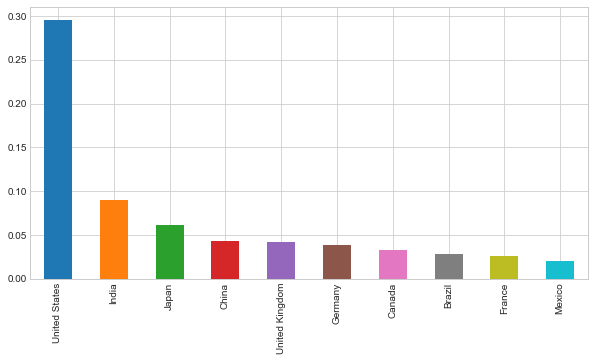

In [18]:
y = data.ctry_name.value_counts(normalize=True).head(10)
print('Percentage of Countries visiting Our Website\n',y*100)
print("\n\nTotal Amount of Visitings we get from these Countries {} %  of Whole Vists.\n\n ".format(y.sum()*100),)
rcParams['figure.figsize'] = 10,5
y.plot(kind='bar')

####  No. of ip_addr and Percentage in Dataset
    

In [19]:
print('Total No. of Countries Visit Our Website is {}'.format(len(data.ip_addr.unique())))

Total No. of Countries Visit Our Website is 450207


In [20]:
top_twnety_ip_addresses = data.ip_addr.value_counts().head(20)

Frequently Visiting IP_ADDRESS 

 b8a8233899cbd26ba1e2207af00ed76f6d3a2393f9967aa43bd4676d264a2894    1777
0ec667e87013e1398ddaa61c14f7118f0dd6adc9abc2a2a0608545b59960fdc9     735
1efe766ebdcd5b9065d8ae9c5e2070201d8ca83768809009f4da5a78dc8acc14     598
c97c81d31fb39cbba79f371dcc09accdb345084c0eb0a3efc146446bce14aead     511
a652f03df170d22eaeb7c665ddd4f7caf5b715adfcca4bd719188e0c3479af5f     476
351e4ae418c4c48c88e06b3b93d9fc289af7a0b732532810f2f802e166d9f8a6     423
631b079478c0b5a49e883077d75caa01c565b56b557f6528f61d435c8e3b464a     415
1384ff0bfb4d6cf26d87bd9e708a481f49e878e3da1f2a67bb41908c3ef9926b     404
9e339f5f2be77a6fa90fadbda66f6fc5e91976cf241511bae4364800ea56846d     399
f5ea00b9b7b886aea00a9c66a5efd2d24bd4de3ea549f2d92ed9de4db6817b77     386
3a75ed84098fe09a140fafc5d651b3c14c4b2d287c8f233e559a3c8201feccb6     381
65d72f65fb8ceb5278ebf7cf21ae980bc21bf0cdd2da6fb7645f680e0cc0e203     357
4ef363fa0126dcf76c9963dc63a4c725d39d83ea618cde907596ffbc30d0fe5e     351
672d30cb3386c17a3

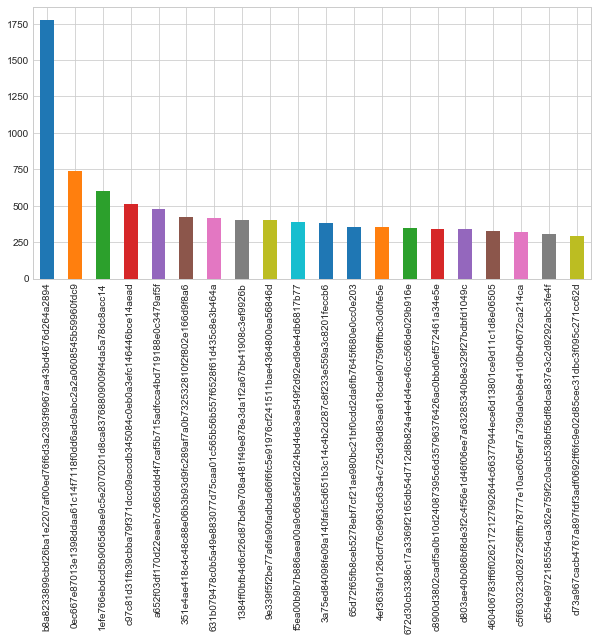

In [21]:
print("Frequently Visiting IP_ADDRESS \n\n",top_twnety_ip_addresses)
#print("\n\nTotal Amount of Visitings we get from these IP_ADDRESS {} %  of Whole Vists.\n\n ".format(top_twnety_ip_addresses.sum()))
top_twnety_ip_addresses.plot(kind='bar')

#### No. of user_agent and Percentage in Dataset

In [22]:
print('Total No. of Browsers Visit Our Website is {}'.format(len(data.user_agent.unique())))

Total No. of Browsers Visit Our Website is 39347


In [23]:
top_twnety_Browser = data.user_agent.value_counts().head(20)

Probability of  getting visited by Browser
 MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPLEWEBKIT/537.36 (KHTML  LIKE GECKO) CHROME/72.0.3626.121 SAFARI/537.36                          22.000818
MOZILLA/5.0 (WINDOWS NT 6.1; WIN64; X64) APPLEWEBKIT/537.36 (KHTML  LIKE GECKO) CHROME/72.0.3626.121 SAFARI/537.36                            6.887305
MOZILLA/5.0 (WINDOWS NT 6.1; WOW64; TRIDENT/7.0; RV:11.0) LIKE GECKO                                                                          3.595981
MOZILLA/5.0 (WINDOWS NT 10.0; WOW64; TRIDENT/7.0; RV:11.0) LIKE GECKO                                                                         3.481245
MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE MAC OS X) APPLEWEBKIT/605.1.15 (KHTML  LIKE GECKO) VERSION/12.0 MOBILE/15E148 SAFARI/604.1     3.240596
MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64; RV:65.0) GECKO/20100101 FIREFOX/65.0                                                                2.971669
MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPLEWEB

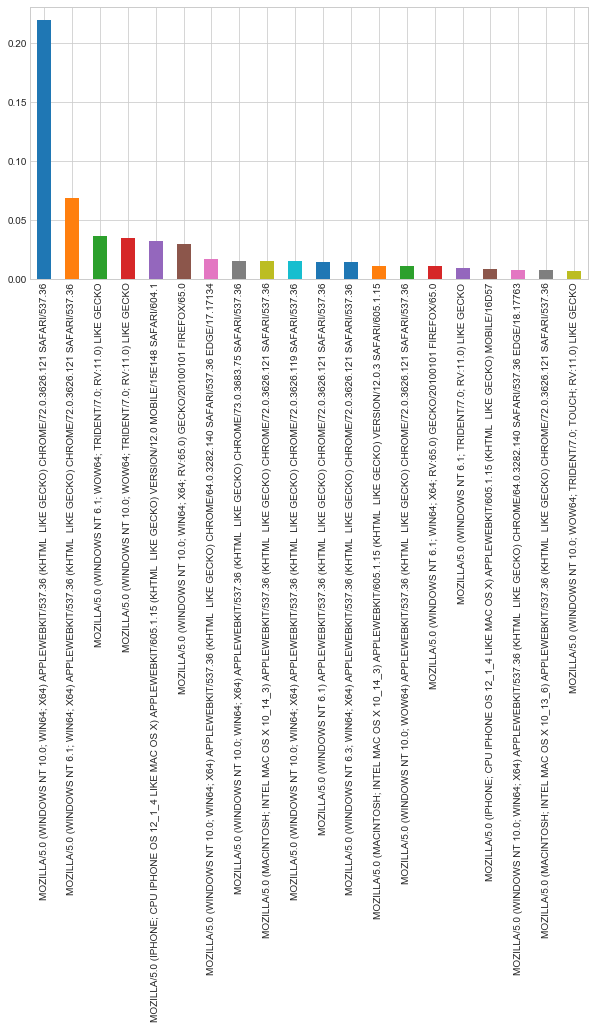

In [24]:
y = data.user_agent.value_counts(normalize=True).head(20)
print('Probability of  getting visited by Browser\n',y*100)
print("\n\nTotal Amount of Visitings we get from these Browsers {} %  of Whole Vists.\n\n ".format(y.sum()*100),)
y.plot(kind='bar')

#### No. of operating_sys and Percentage in Dataset

In [25]:
print('Total No. of operating_sys that Visits Our Website is {}'.format(len(data.operating_sys.unique())))

Total No. of operating_sys that Visits Our Website is 174


In [26]:
top_ten_operating = data.operating_sys.value_counts(normalize=True)[:10]
top_ten_operating

MICROSOFT_WINDOWS10     0.435224
MICROSOFT_WINDOWS7      0.220856
IOS_12.1.4              0.051824
MACINTOSH_OS X 10.14    0.049667
MICROSOFT_WINDOWS8.1    0.030164
ANDROID_8.0.0           0.026964
LINUX                   0.023658
MACINTOSH_OS X 10.13    0.021025
ANDROID_8.1.0           0.020429
ANDROID_9               0.015995
Name: operating_sys, dtype: float64


Percentage of  getting visited by Particular Operating System

 MICROSOFT_WINDOWS10     43.522439
MICROSOFT_WINDOWS7      22.085556
IOS_12.1.4               5.182412
MACINTOSH_OS X 10.14     4.966697
MICROSOFT_WINDOWS8.1     3.016378
ANDROID_8.0.0            2.696436
LINUX                    2.365794
MACINTOSH_OS X 10.13     2.102504
ANDROID_8.1.0            2.042891
ANDROID_9                1.599519
Name: operating_sys, dtype: float64


Total Amount of Visitings we get from these openrating_systems is 89.58062654764451 %  of Whole Vists.

 


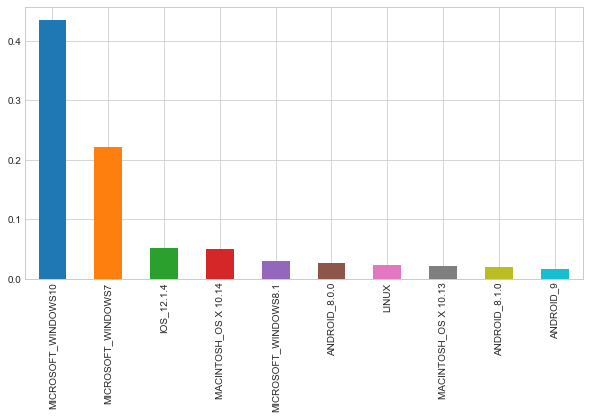

In [27]:
y = data.operating_sys.value_counts(normalize=True)[:10]
print('\nPercentage of  getting visited by Particular Operating System\n\n',y*100)
print("\n\nTotal Amount of Visitings we get from these openrating_systems is {} %  of Whole Vists.\n\n ".format(y.sum()*100),)
y.plot(kind='bar')

# 3. Finding Correlation Between Columns